In [1]:
#Preprocessing
import matplotlib.pyplot as plt

In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [428]:
dfX_train=pd.read_csv('X_train.csv', header=None)
dfY_train = pd.read_csv('Y_train.csv', header=None)
x_train = dfX_train.to_numpy()   
y_train = dfY_train.to_numpy()


In [429]:
lambdaValue = 0
wRR_1 =[]
wRR_2 =[]
wRR_3 =[]
wRR_4 =[]
wRR_5 =[]
wRR_6 =[]
wRR_7 =[]
traces = []
for lambdaValue in range(0,5000):
    wRR = np.linalg.inv((lambdaValue * np.identity(7))+x_train.transpose().dot(x_train)).dot(x_train.transpose()).dot(y_train)
    trace = np.trace(x_train.dot(np.linalg.inv(x_train.transpose().dot(x_train)+lambdaValue*np.identity(7))).dot(x_train.transpose()))
    wRR_1.append(wRR[0])
    wRR_2.append(wRR[1])
    wRR_3.append(wRR[2])
    wRR_4.append(wRR[3])
    wRR_5.append(wRR[4])
    wRR_6.append(wRR[5])
    wRR_7.append(wRR[6])
    traces.append(trace)
    

In [448]:
#a

In [430]:
df=pd.DataFrame({'x': traces, 'y1': wRR_1, 'y2': wRR_2, 'y3': wRR_3,'y4':wRR_4, 'y5':wRR_5, 'y6':wRR_6, 'y7':wRR_7 })

<ipython-input-431-61c793410120>:1: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x', 'y1', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue',label="cylinder",linewidth=1)
<ipython-input-431-61c793410120>:2: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=1,label="displacement")
<ipython-input-431-61c793410120>:3: RuntimeWarning: Se

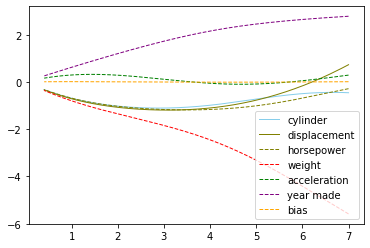

In [431]:
plt.plot( 'x', 'y1', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue',label="cylinder",linewidth=1)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=1,label="displacement")
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=1, linestyle='dashed', label="horsepower")
plt.plot( 'x', 'y4', data=df, marker='', color='red', linewidth=1, linestyle='dashed', label="weight")
plt.plot( 'x', 'y5', data=df, marker='', color='green', linewidth=1, linestyle='dashed', label="acceleration")
plt.plot( 'x', 'y6', data=df, marker='', color='purple', linewidth=1, linestyle='dashed', label="year made")
plt.plot( 'x', 'y7', data=df, marker='', color='orange', linewidth=1, linestyle='dashed', label="bias")
plt.legend()


In [449]:
#b

The parameters weight and year made are the two parameters that stand out from the rest, as visible in the final graph. Itimplies that the weight and the year vary greatly with the nuber degree of freedoms of lambda.



In [432]:
dfX_test = pd.read_csv('X_test.csv', header=None)
dfY_test = pd.read_csv('Y_test.csv', header=None)
y_test = dfY_test.to_numpy()
x_test = dfX_test.to_numpy()

In [450]:
#c

In [433]:




y_test_calc = []
rmseArray = []
lambdaArray = [k for k in range(0,51)]
for lambdaValue in range(0,51):
    wRR = np.linalg.inv((lambdaValue * np.identity(7))+x_train.transpose().dot(x_train)).dot(x_train.transpose()).dot(y_train)
    trace = np.trace(x_train.dot(np.linalg.inv(x_train.transpose().dot(x_train)+lambdaValue*np.identity(7))).dot(x_train.transpose()))
    y_test_calc = x_test.dot(wRR)
    squareSum = 0
    for i in range(0,len(y_test)):
        squareSum += pow(y_test[i]-y_test_calc[i],2)
    rm =  math.sqrt(squareSum/42)   
    rmseArray.append(rm)
    

In [434]:
dfRMS = pd.DataFrame({'x':lambdaArray,'y':rmseArray})

<ipython-input-435-0603c16f355d>:1: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)


Text(0.5, 1.0, 'LAMBDA GRAPH FROM RMSE vs LAMBDA')

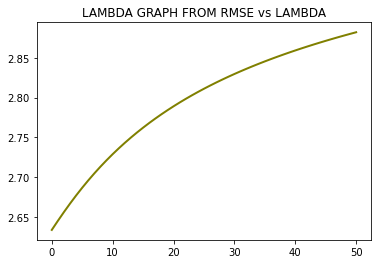

In [435]:
plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)
plt.title('LAMBDA GRAPH FROM RMSE vs LAMBDA')

In [451]:
#d

<ipython-input-436-31f37bfa5ee9>:12: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)


Text(0.5, 1.0, ' RMSE vs LAMBDA (0-100)')

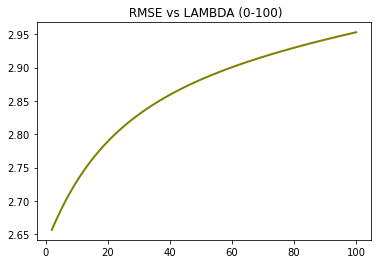

In [436]:
rmseArrayPolynomialOne = []
lambdaArray = [k for k in range(0,101)]
for lambdaValue in range(0,101):
    wRR = np.linalg.inv((lambdaValue * np.identity(7))+x_train.transpose().dot(x_train)).dot(x_train.transpose()).dot(y_train)
    y_test_calc = x_test.dot(wRR)
    squareSum = 0
    for i in range(0,len(y_test)):
        squareSum += pow(y_test[i]-y_test_calc[i],2)
    rm =  math.sqrt(squareSum/42)   
    rmseArrayPolynomialOne.append(rm)
dfRMS = pd.DataFrame({'x':lambdaArray[2:],'y':rmseArrayPolynomialOne[2:]})
plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2) 
plt.title(' RMSE vs LAMBDA (0-100)')

In [437]:
width = len(x_train[0])
scaler = StandardScaler()

x_train_temp = np.power(x_train,2)
x_test_temp = np.power(x_test,2)

x_train_temp = (x_train_temp-np.mean(x_train_temp))/np.std(x_train_temp)
x_test_temp = (x_test_temp-np.mean(x_test_temp))/np.std(x_test_temp)

x_test_polynomialSquare=np.append(x_test,x_test_temp,axis=1)
x_train_polynomialSquare=np.append(x_train,x_train_temp,axis=1)
x_train_polynomialSquare = (x_train_polynomialSquare-np.mean(x_train_polynomialSquare))/np.std(x_train_polynomialSquare)
x_test_polynomialSquare = (x_test_polynomialSquare-np.mean(x_train_polynomialSquare))/np.std(x_train_polynomialSquare)

In [438]:
rmseArrayPolynomialSquare = []
lambdaArray = [k for k in range(0,101)]
for lambdaValue in range(0,101):
    wRR = np.linalg.inv((lambdaValue * np.identity(14))+x_train_polynomialSquare.transpose().dot(x_train_polynomialSquare)).dot(x_train_polynomialSquare.transpose()).dot(y_train)
    y_test_calc = x_test_polynomialSquare.dot(wRR)
    squareSum = 0
    for i in range(0,len(y_test)):
        squareSum += pow(y_test[i]-y_test_calc[i],2)
    rm =  math.sqrt(squareSum/42)   
    rmseArrayPolynomialSquare.append(rm)

<ipython-input-439-5e5059fe2411>:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)


Text(0.5, 1.0, ' RMSE vs LAMBDA for p2 (0-100)')

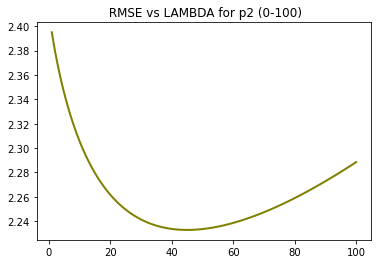

In [439]:
dfRMS = pd.DataFrame({'x':lambdaArray[1:],'y':rmseArrayPolynomialSquare[1:]})
plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)
plt.title(' RMSE vs LAMBDA for p2 (0-100)')

In [440]:
(min(rmseArrayPolynomialSquare))

2.23275048800763

In [441]:
width = len(x_train[0])
x_train_temp = np.power(x_train,2)
x_test_temp = np.power(x_test,2)
x_train_temp = (x_train_temp-np.mean(x_train_temp))/np.std(x_train_temp)
x_test_temp = (x_test_temp-np.mean(x_test_temp))/np.std(x_test_temp)
x_test_polynomialCube=np.append(x_test,x_test_temp,axis=1)
x_train_polynomialCube=np.append(x_train,x_train_temp,axis=1)

x_train_temp = np.power(x_train,3)
x_test_temp = np.power(x_test,3)
x_train_temp = (x_train_temp-np.mean(x_train_temp))/np.std(x_train_temp)
x_test_temp = (x_test_temp-np.mean(x_test_temp))/np.std(x_test_temp)
x_test_polynomialCube=np.append(x_test_polynomialCube,x_test_temp,axis=1)
x_train_polynomialCube=np.append(x_train_polynomialCube,x_train_temp,axis=1)


rmseArrayPolynomialCube = []
lambdaArray = [k for k in range(0,101)]
for lambdaValue in range(0,101):
    wRR = np.linalg.inv((lambdaValue * np.identity(21))+x_train_polynomialCube.transpose().dot(x_train_polynomialCube)).dot(x_train_polynomialCube.transpose()).dot(y_train)
    y_test_calc = x_test_polynomialCube.dot(wRR)
    squareSum = 0
    for i in range(0,len(y_test)):
        squareSum += pow(y_test[i]-y_test_calc[i],2)
    rm =  math.sqrt(squareSum/42)   
    rmseArrayPolynomialCube.append(rm)

<ipython-input-442-5ccbf9f61dc7>:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)


Text(0.5, 1.0, ' RMSE vs LAMBDA for p3 (0-100)')

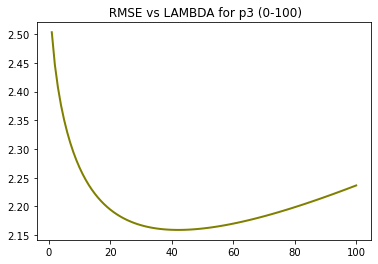

In [442]:
dfRMS = pd.DataFrame({'x':lambdaArray[1:],'y':rmseArrayPolynomialCube[1:]})
plt.plot('x', 'y', data=dfRMS, marker='', color='olive', linewidth=2)
plt.title(' RMSE vs LAMBDA for p3 (0-100)')

In [443]:
print ('lambda value for p3 in polynomial: '+str(rmseArrayPolynomialCube.index(min(rmseArrayPolynomialCube[2:]))))
print ('lambda value for p2 in polynomial: '+str(rmseArrayPolynomialSquare.index(min(rmseArrayPolynomialSquare[2:]))))

lambda value for p3 in polynomial: 42
lambda value for p2 in polynomial: 45


<ipython-input-445-06bddded779a>:2: RuntimeWarning: Second argument 'y1' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y1', data=dfRMS, marker='', color='olive', linewidth=2,label = 'p3')
<ipython-input-445-06bddded779a>:3: RuntimeWarning: Second argument 'y2' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x', 'y2', data=dfRMS, marker='', color='red', linewidth=2,label = 'p2')
<ipython-input-445-06bddded779a>:4: RuntimeWarning: Second argument 'y3' is ambiguous: could be a format

Text(0.5, 1.0, 'PYPLOT : Polynomial graph RMSE vs lambda')

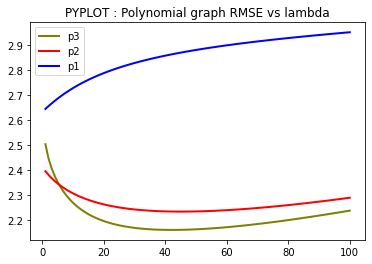

In [445]:
dfRMS = pd.DataFrame({'x':lambdaArray[1:],'y1':rmseArrayPolynomialCube[1:],'y2':rmseArrayPolynomialSquare[1:],'y3':rmseArrayPolynomialOne[1:]})
plt.plot('x', 'y1', data=dfRMS, marker='', color='olive', linewidth=2,label = 'p3')
plt.plot('x', 'y2', data=dfRMS, marker='', color='red', linewidth=2,label = 'p2')
plt.plot('x', 'y3', data=dfRMS, marker='', color='blue', linewidth=2,label = 'p1')
plt.legend()
plt.title('PYPLOT : Polynomial graph RMSE vs lambda')

 From the above graph, we can say that we should use p3 inorder to a minimal Root mean square error. However this doesnt imply that we need to keep increasing the polynomial degree as this may lead to overfitting.

When lambda is equal to 0, we get a least square solution. However, as it is visible, the root mean square error for higher degree polynomials is higher when lambda is zero. This changes and we observe the lambda value for lowest mean square error to be in the range of 40-60. 

Thus the ideal value of lambda for both p2 and p3 (and should be the same suit for subsequent higher degree polynomials) is in the 40-60 range. 

Contrast this with the lambda value for p1, where the root mean square error keeps increasing as we tend to increase lambda
